# PHASE 3 PROJECT

* Student name: Martin Omondi
* Student pace: Hybrid/full time
* Instructor name: Diana Mongina/ Antonny Muiko

## Project Description
In this project description, we will cover:
* Project Overview
* Deliverables
* Grading
* Getting Started

# Project Overview
For this project we will be using the full data science process from start to finish, solving a classification problem using a dataset of your choice.

# Business Problem and Data.
It is up to you to define a stakeholder, a business problem, and you are also responsible for choosing a dataset.

# Business Understanding.
I have chosen a heart disease prediction dataset, my stakeholder is a hospital administrator. We would like to predict the likelihood of a patient having a heart disease based on their medical history and other factors. In order to help the hospital administrator make informed decisions about resource allocation and patient care. 

A classification problem in data science is a type of supervised learning problem where the goal is to predict a categorical label or class that an instance belongs to, based on its features or characteristics.

# Data understanding
The data used in this analysis contains data collected from the dataset: Heart disease-prediction. A heart disease prediction dataset typically consists of various features related to patient characterisctics and medical history. These features can include age, sex, blood pressure, cholestorol levels, smoking habits and other relevant factors. The dataset may also contain a target variable indicating whether the patient has a heart disease or not.

# Data Preparation
Data preparation will involve cleaning our data by removing duplicates, dealing with missing values. Some transformations such as merging, imputation will be done to make our data easier to use. Let's investigate the data we have chosen.



### Import necessary libraries to be used in data preparation

In [355]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import warnings
warnings.filterwarnings('ignore')

In [356]:
# Load the dataset
df = pd.read_csv("Data\heart-disease.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Data Analysis
### We will now explore our dataset
This is a crucial step in the data science process that involves systematically exploring and summarizing the main characteristics of a dataset. The goal here is to gain a deeper understanding of the data, identinty patterns, realtionships and anomalies.

In [357]:
# Get all information about our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [358]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


### Handle any case of missing values.
With the above information we can be safe to say that our data is clean without missing value\data.

In [359]:
# We will confirm this statement above by printing for missing values.
print(df.isna().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [360]:
print(df.duplicated().sum())
df.drop_duplicates(inplace= True)

1


In [361]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,302.0,54.420530,9.047970,29.0,48.00,55.5,61.00,77.0
sex,302.0,0.682119,0.466426,0.0,0.00,1.0,1.00,1.0
cp,302.0,0.963576,1.032044,0.0,0.00,1.0,2.00,3.0
trestbps,302.0,131.602649,17.563394,94.0,120.00,130.0,140.00,200.0
chol,302.0,246.500000,51.753489,126.0,211.00,240.5,274.75,564.0
fbs,302.0,0.149007,0.356686,0.0,0.00,0.0,0.00,1.0
restecg,302.0,0.526490,0.526027,0.0,0.00,1.0,1.00,2.0
thalach,302.0,149.569536,22.903527,71.0,133.25,152.5,166.00,202.0
exang,302.0,0.327815,0.470196,0.0,0.00,0.0,1.00,1.0
oldpeak,302.0,1.043046,1.161452,0.0,0.00,0.8,1.60,6.2


In [362]:
df.columns


Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

# Data Visualization
Import Seaborn for further visualization of the dataset

find out the number of males and female affected by heart disease

<Axes: xlabel='sex', ylabel='count'>

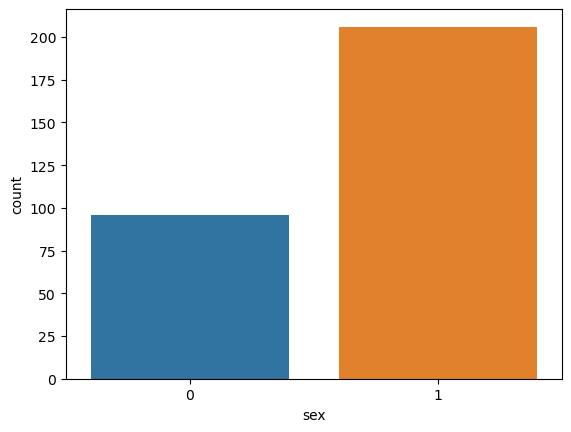

In [363]:
sns.countplot(x='sex',data=df)

# Distribution of Each Column

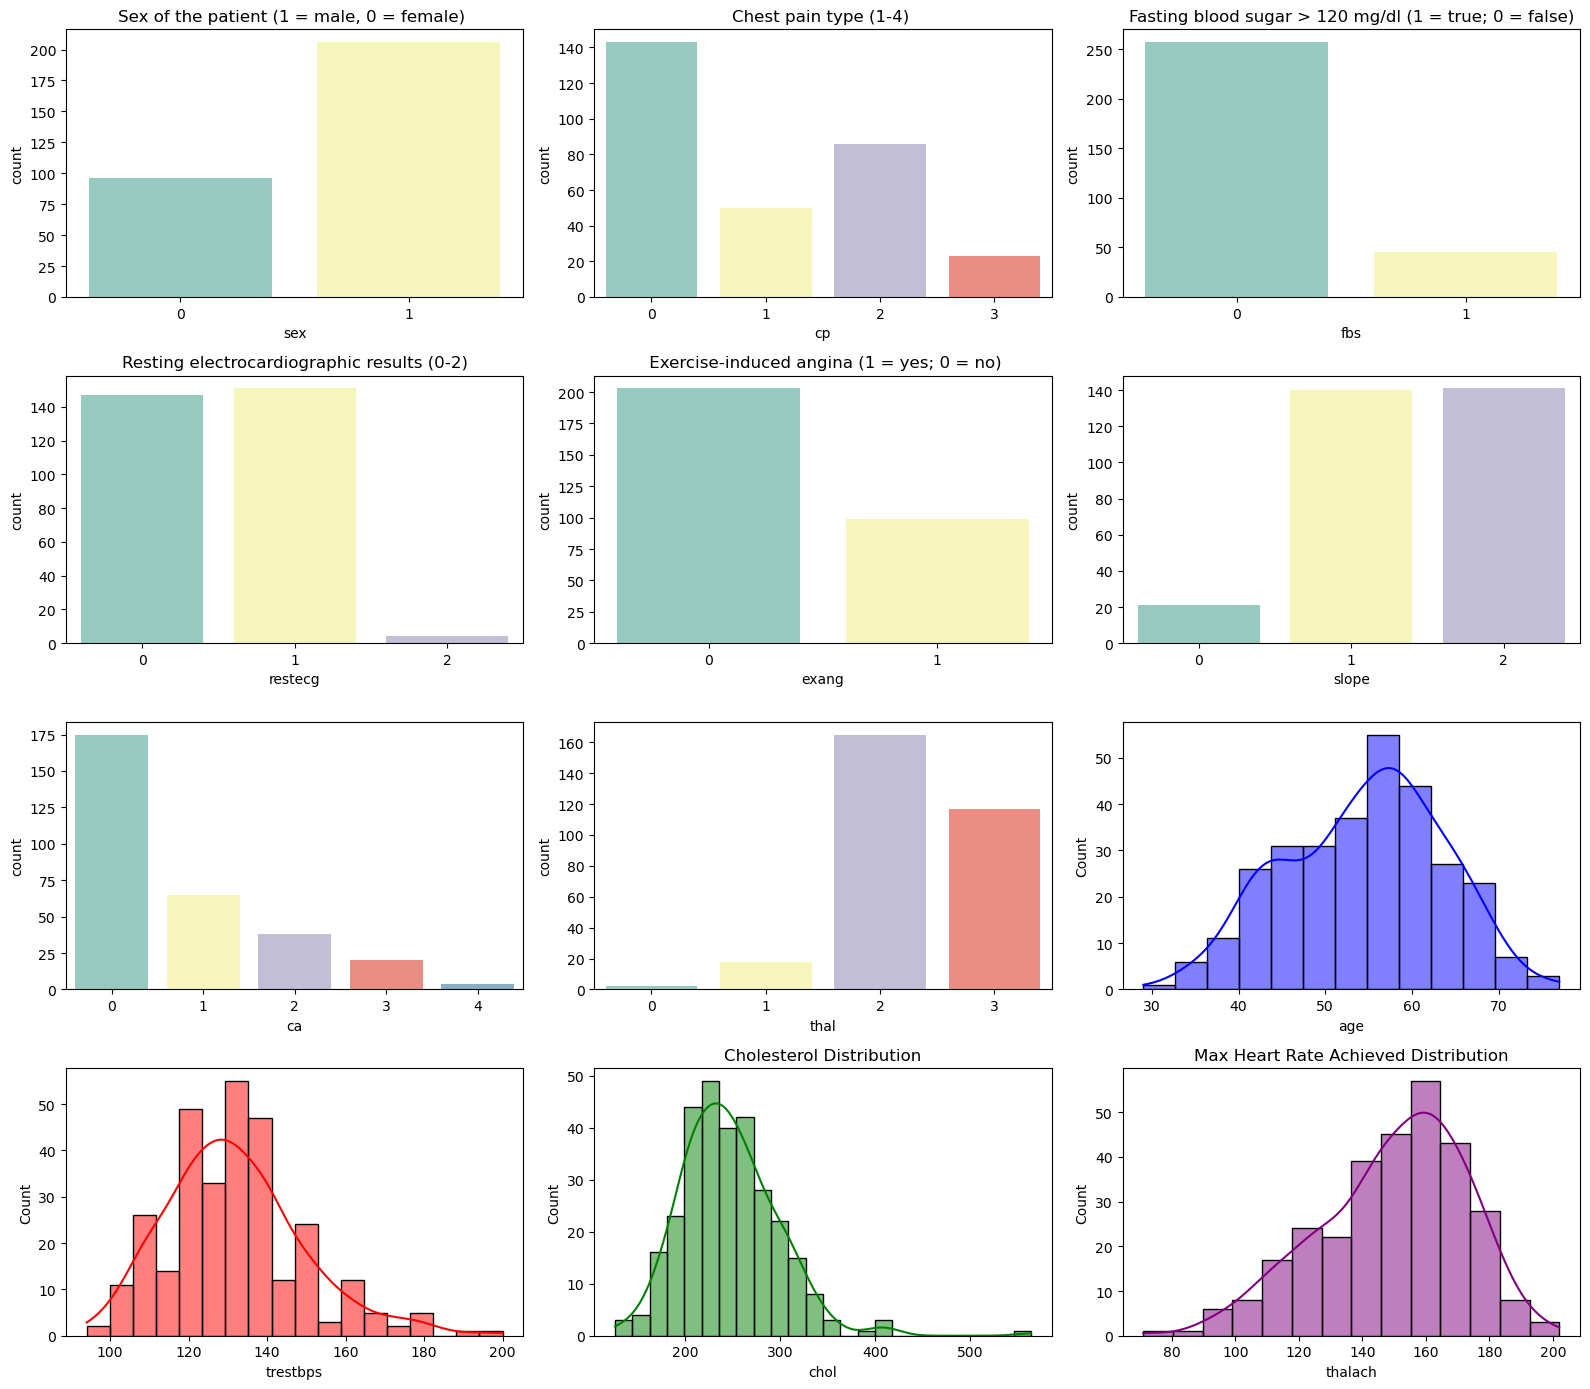

In [364]:
# Distribution of Data
plt.figure(figsize=(16, 14))

# Distribution of sex
plt.subplot(4, 3, 1)
sns.countplot(x=df["sex"], data=df, palette='Set3')
plt.title("Sex of the patient (1 = male, 0 = female) ")

# Distribution of fbs
plt.subplot(4, 3, 3)
sns.countplot(x=df["fbs"], data=df, palette='Set3')
plt.title("Fasting blood sugar > 120 mg/dl (1 = true; 0 = false)")

# Distribution of cp
plt.subplot(4, 3, 2)
sns.countplot(x=df["cp"], data=df, palette='Set3')
plt.title("Chest pain type (1-4) ")

# Distribution of restecg
plt.subplot(4, 3, 4)
sns.countplot(x=df["restecg"], data=df, palette='Set3')
plt.title("Resting electrocardiographic results (0-2)")

# Distribution of exang
plt.subplot(4, 3, 5)
sns.countplot(x=df["exang"], data=df, palette='Set3')
plt.title(" Exercise-induced angina (1 = yes; 0 = no)")

# Distribution of slope
plt.subplot(4, 3, 6)
sns.countplot(x=df["slope"], data=df, palette='Set3')

# Distribution of ca
plt.subplot(4, 3, 7)
sns.countplot(x=df["ca"], data=df, palette='Set3')

# Distribution of thal
plt.subplot(4, 3, 8)
sns.countplot(x=df["thal"], data=df, palette='Set3')

# Age Distribution
plt.subplot(4, 3, 9)
sns.histplot(df['age'], kde=True, color='blue')

# Trestbeps Distribution
plt.subplot(4, 3, 10)
sns.histplot(df['trestbps'], kde=True, color='red')

plt.subplot(4, 3, 11)
sns.histplot(df['chol'], kde=True, color='green')
plt.title('Cholesterol Distribution')

plt.subplot(4, 3, 12)
sns.histplot(df['thalach'], kde=True, color='purple')
plt.title('Max Heart Rate Achieved Distribution')


plt.tight_layout()
plt.show()




### Conclusion
* There are more males affected by heart disease than females
* Chest pain type 1 is common
* The majority have normal thalassemia
* Most patients have 0 major vessels colored by fluroscopy,(ca)
* Most patients do not have exercise-induced angina (0)
* The majority of patients have either result 0 or 1 rest ecg

## Distribution of Each Column Vs Target

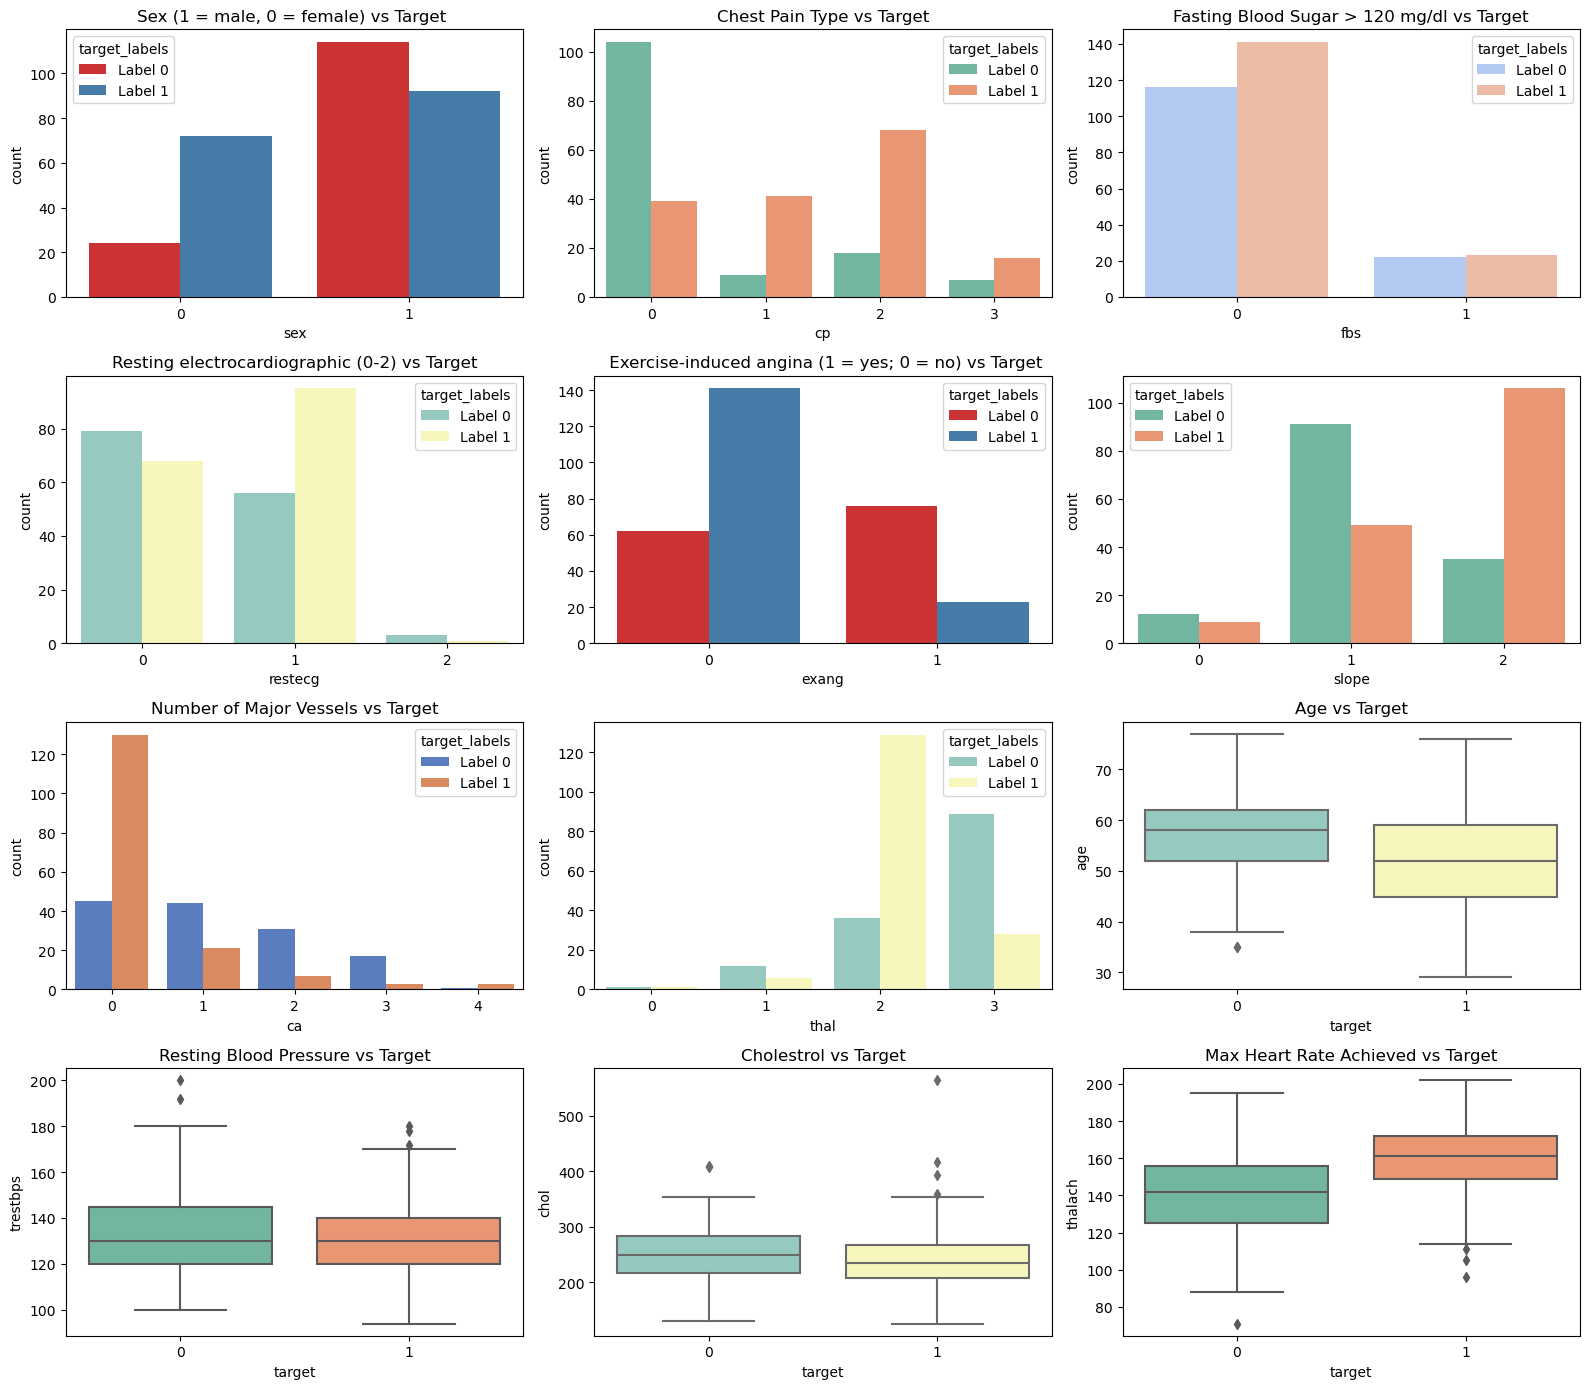

In [365]:
# Convert target column to categorical
df['target'] = pd.Categorical(df['target'])

# Create a mapping from integer values to string values
target_labels = {val: f'Label {val}' for val in df['target'].unique()}
df['target_labels'] = df['target'].map(target_labels)


# Distribution of Data
plt.figure(figsize=(16, 14))

# sex vs Target
plt.subplot(4, 3, 1)
sns.countplot(x='sex', hue='target_labels', data=df, palette='Set1')
plt.title("Sex (1 = male, 0 = female) vs Target ")


plt.subplot(4, 3, 2)
sns.countplot(x='cp', hue='target_labels', data=df, palette='Set2')
plt.title('Chest Pain Type vs Target')

plt.subplot(4, 3, 3)
sns.countplot(x='fbs', hue='target_labels', data=df, palette='coolwarm')
plt.title('Fasting Blood Sugar > 120 mg/dl vs Target')

plt.subplot(4, 3, 4)
sns.countplot(x='restecg', hue='target_labels', data=df, palette='Set3')
plt.title("Resting electrocardiographic (0-2) vs Target")


plt.subplot(4, 3, 5)
sns.countplot(x='exang', hue='target_labels', data=df, palette='Set1')
plt.title(" Exercise-induced angina (1 = yes; 0 = no) vs Target")

# Distribution of slope
plt.subplot(4, 3, 6)
sns.countplot(x='slope', hue='target_labels', data=df, palette='Set2')

# Distribution of ca
plt.subplot(4, 3, 7)
sns.countplot(x='ca', hue='target_labels', data=df, palette='muted')
plt.title('Number of Major Vessels vs Target')

# Distribution of thal
plt.subplot(4, 3, 8)
sns.countplot(x='thal', hue='target_labels', data=df, palette='Set3')


# Age vs Target
plt.subplot(4, 3, 9)
sns.boxplot(x='target', y='age', data=df, palette='Set3')
plt.title('Age vs Target')

# Trestbeps vs Target
plt.subplot(4, 3, 10)
sns.boxplot(x='target', y='trestbps', data=df, palette='Set2')
plt.title('Resting Blood Pressure vs Target')

plt.subplot(4, 3, 11)
sns.boxplot(x='target', y='chol', data=df, palette='Set3')
plt.title('Cholestrol vs Target')

plt.subplot(4, 3, 12)
sns.boxplot(x='target', y='thalach', data=df, palette='Set2')
plt.title('Max Heart Rate Achieved vs Target')


plt.tight_layout()
plt.show()



## Conclusion
* The higher the slope, heart disease is more likely
* There is no significant difference in resting blood pressure and cholestrol level between patients with and without heart disease.
* Patients with heart disease tend to have a lower maximum heart rate achieved compared to those without heart disease.
* Male patients(1) have a higher chance of heart disease than female patients(0)
* The box plots shows that the age distribution is similar between patients with and without heart disease.
* Patients with heart disease tend to have a lower maximum heart rate achieved compared to those without heart disease.
* Higher rest ecg higher chances of having the disease.


## Prepare Data for Model


In [366]:
# Make sure that all non-numeric columns are converted to numeric.
df.dtypes 

age                 int64
sex                 int64
cp                  int64
trestbps            int64
chol                int64
fbs                 int64
restecg             int64
thalach             int64
exang               int64
oldpeak           float64
slope               int64
ca                  int64
thal                int64
target           category
target_labels    category
dtype: object

In [367]:
df['target'] = df['target'].cat.codes

## Separate Dependant and Independant variables

In [368]:
# Split data into training and testing sets
X = df.drop('target', axis=1)
y = df['target']

y_train = y_train.map({v: k for k, v in target_labels.items()})
y_test = y_test.map({v: k for k, v in target_labels.items()})

# train test split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [369]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target_labels
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,Label 1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,Label 1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,Label 1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,Label 1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,Label 1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,Label 0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,Label 0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,Label 0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,Label 0


In [370]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 302, dtype: int8

## Data Modelling
Building Model using Logistic Regression

In [371]:
# Import necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [372]:
from sklearn.preprocessing import StandardScaler

# Select only the numerical columns
numerical_cols = X_train.select_dtypes(include=[np.number])

# Scale the numerical columns using StandardScaler
scaler = StandardScaler()
numerical_cols_scaled = scaler.fit_transform(numerical_cols)

# Assign the scaled values back to the original columns
X_train[numerical_cols.columns] = numerical_cols_scaled

# Scale the test data using the same scaler
numerical_cols_test = X_test.select_dtypes(include=[np.number])
numerical_cols_test_scaled = scaler.transform(numerical_cols_test)
X_test[numerical_cols_test.columns] = numerical_cols_test_scaled

## One hot encoding
This is a technique used to convert categorical variables into a numerical representation that can be used by machine learning algorithms>

In [373]:
# one hot encoding
X_train = pd.get_dummies(X_train, columns=['target_labels'])
X_test = pd.get_dummies(X_test, columns=['target_labels'])

In [374]:

# fit logistic Regression
lr = LogisticRegression()

## Train logistic regression model

In [375]:
lr.fit(X_train,y_train)

LogisticRegression()

In [376]:
# predictions
y_pred = lr.predict(X_test)
y_pred

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int8)

## Testing
See how our model is working

In [380]:
# print confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV

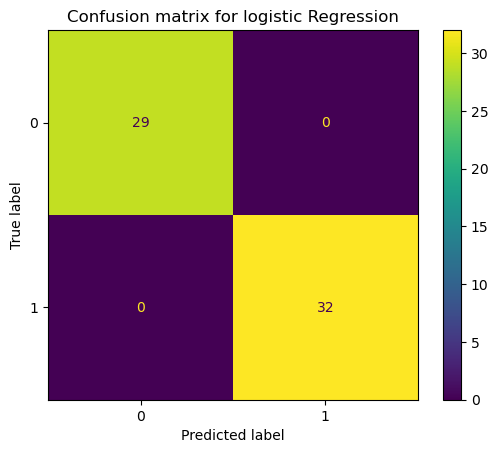

In [381]:
cm_log = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_log)

disp.plot()
plt.title(f'Confusion matrix for logistic Regression')
plt.show()

In [382]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      1.00      1.00        32

    accuracy                           1.00        61
   macro avg       1.00      1.00      1.00        61
weighted avg       1.00      1.00      1.00        61




# Decision Trees
## Building our second model
This is a fundamental concept in machine learning modeling
A Decision Tree is a tree-like-model that uses a series of decisions or rules to classify data or predict continuous outcomes. It is a supervised learning algorithm that can be used for both classification and regression tasks.

In [386]:
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix 

In [388]:
#drop column with categorical variables
df2 = df.drop('target_labels', axis=1)

In [392]:
# split the dataset into training and testing sets
X = df2.drop('target', axis=1)
y = df2['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [393]:
# Create and train a Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [394]:
# Evaluating the model
y_pred = dt_classifier.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.7704918032786885
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.86      0.78        29
           1       0.85      0.69      0.76        32

    accuracy                           0.77        61
   macro avg       0.78      0.77      0.77        61
weighted avg       0.78      0.77      0.77        61

Confusion Matrix:
[[25  4]
 [10 22]]


# Conclusion
The Decision Tree Classifier achieved an accuracy of 0.7705, indicating that it correctly classified approximately 77% of the samples in the dataset. The classification report provides a more detailed breakdown of the model's performance.

The precision and recall scores for each class suggest that the model is slightly better at predicting class 1 (precision: 0.85, recall: 0.69) than class 0 (precision: 0.71, recall: 0.86). The F1-score, which balances precision and recall, is similar for both classes (0.78 and 0.76, respectively).

The confusion matrix reveals that the model misclassified 4 samples from class 0 as class 1, and 10 samples from class 1 as class 0. This suggests that the model may be biased towards class 1, as it tends to misclassify more samples from class 1 as class 0.